In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Data/auto.csv")
df = df[df["horsepower"] != "?"]
df = df.astype({'horsepower':'int64'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [4]:
import matplotlib.pyplot as plt     # Compute the correlation matrix
import seaborn as sns
corr = df.corr()
corr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005


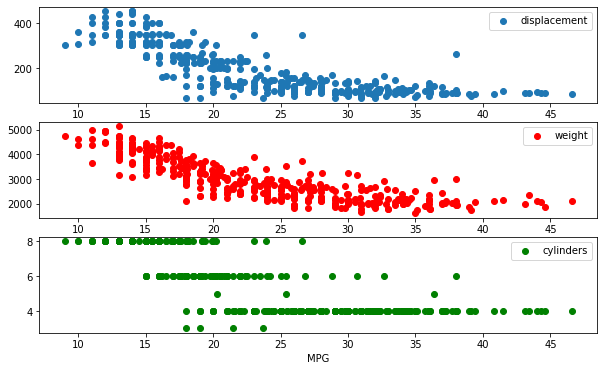

In [5]:
df_mpg = df[["mpg"]]
df_displacement = df[["displacement"]]
df_weight = df[["weight"]]
df_acceleration = df[["acceleration"]]
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(df_mpg, df_displacement, label="displacement")
ax[0].legend()
ax[1].scatter(df_mpg, df_weight, color="r", label="weight")
ax[1].legend()
ax[2].scatter(df_mpg, df[["cylinders"]], color="g", label="cylinders")
ax[2].legend()
ax[2].set_xlabel("MPG")

"""
sns.pairplot(df) 
"""
plt.show()

In [6]:
import statsmodels.api as sm

import pandas as pd

from patsy import dmatrices

In [7]:
y_train, x_train = dmatrices('mpg ~ horsepower', data=df, return_type='dataframe')  #everything before ~ is getting the y_train

In [8]:
model = sm.OLS(y_train, x_train)    # Describe model

result = model.fit()       # Fit model

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           7.03e-81
Time:                        15:53:28   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [9]:
print("Parameter of result: " + str(result.params))
print("R-squared of result: " +  str(result.rsquared))
predicted_result = result.predict()

Parameter of result: Intercept     39.935861
horsepower    -0.157845
dtype: float64
R-squared of result: 0.6059482578894348


eval_env: 1
eval_env: 1


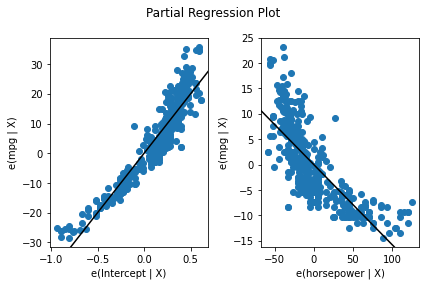

In [10]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=1.0)

Now with more feature columns for the linear regression model

In [11]:
df_squared = df
df_squared["squared_weight"] = (df["weight"] * df["weight"])
y_train, x_train = dmatrices('mpg ~ horsepower + weight + displacement + cylinders + squared_weight', data=df_squared, return_type='dataframe')  #everything before ~ is getting the y_train

mf_model = sm.OLS(y_train, x_train)    # Describe model

mf_result = mf_model.fit()       # Fit model

print(mf_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     217.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.37e-110
Time:                        15:53:30   Log-Likelihood:                -1098.7
No. Observations:                 392   AIC:                             2209.
Df Residuals:                     386   BIC:                             2233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.4578      3.149     20.

# Conclusion
    for the P>|t| displacement and cylinders have a high value, so these are statistically not significant (good features) for the linear regression model

    
    Es kann sein das der p-value abweicht, wenn man andere features als auswahl wählt. 

    r-squared soll hoch sein, man kann mit den features spielen bis man einen hochen r-squared erreicht.

    Man kann ausprobieren, ob wenn man die features transformiert, d.h. vorher einen logarithmischen Muster folgten und jetzt linearisiert wurden, mehr Aussagen treffen kann.
    

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


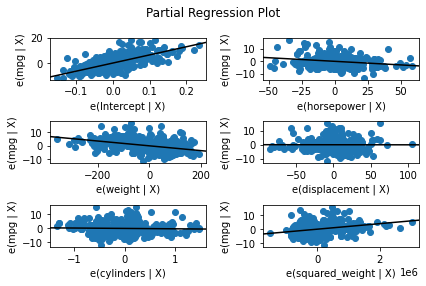

In [12]:
fig = sm.graphics.plot_partregress_grid(mf_result)
fig.tight_layout(pad=1.0)